# COMP402
Code used for Honour's Project Course

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1]:
#!jupyter --version

# Checking for the version of Python
#from platform import python_version
#print(python_version())

In [3]:
fin = "460_ALU_TypeREF_MELT2_GIAB_test-version.csv"

In [4]:
df = pd.read_csv(fin)
df = df.astype(str)
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1
...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1


In [5]:
#df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"] + "-" + df["STOP"]
df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"].str[:6]
df["merged_name2"] = df["merged_name"].str[:10]
df["merged_name3"] = df["merged_name"].str[:9]
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1,chrX:112877,chrX:11287,chrX:1128
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1,chrX:119643,chrX:11964,chrX:1196
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1,chrX:135157,chrX:13515,chrX:1351
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1,chrX:138384,chrX:13838,chrX:1383


In [6]:
df_01 = df[df["GIAB"] == "0/1"]
df_01["merged_name3"].to_csv("GIAB_460_10_loci_3.csv", index=False, header=False)

In [7]:
df_11 = df[df["GIAB"] == "1/1"]
df_11["merged_name3"].to_csv("GIAB_460_11_loci_3.csv", index=False, header=False)

In [8]:
df_01

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,21,30601827,30602144,0/1,34,14,0/1,39,12,0/1,"-81.21,-32.51,-435.02",0/1,chr21:306018,chr21:3060,chr21:306
223,21,38961715,38961986,0/1,27,7,0/1,23,3,0/1,"-24.4,-17.46,-264.04",0/1,chr21:389617,chr21:3896,chr21:389
224,21,41586880,41587182,0/1,27,10,0/1,44,9,0/1,"-34.81,-18.66,-249.01",0/1,chr21:415868,chr21:4158,chr21:415
225,21,41957251,41957376,0/1,14,11,0/1,21,12,0/1,"-46.41,-25.29,-346.01",0/1,chr21:419572,chr21:4195,chr21:419


# Part 2

In [9]:
f00 = "GIAB_00_f2.csv"
f10 = "GIAB_10_f2.csv"
f11 = "GIAB_11_f2.csv"

In [10]:
df00 = pd.read_csv(f00, header=None)
df10 = pd.read_csv(f10, header=None)
df11 = pd.read_csv(f11, header=None)
df00 = df00.astype(str)
df10 = df10.astype(str)
df11 = df11.astype(str)
df00

,0
0,chr10:2402963-2403297/ 0/0 210 12 222
1,chr10:51539308-51539401/ 0/0 52 18 70
2,chr10:75969790-75970127/ 0/0 248 22 270
3,chr10:79764973-79765218/ 0/0 188 20 208
4,chr10:8516524-8516843/ 0/0 218 22 240
...,...
95,chr9:77503386-77503546/ 0/0 96 46 142
96,chrX:113850728-113851049/ 0/0 84 12 96
97,chrX:43238081-43238371/ 0/0 74 12 86
98,chrX:54290473-54290777/ 0/0 112 4 116


In [11]:
# split column into multiple columns by delimiter 
df00 = df00[0].str.split(' ', expand=True)
df10 = df10[0].str.split(' ', expand=True)
df11 = df11[0].str.split(' ', expand=True)

df00

,0,1,2,3,4
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [12]:
# locus = dir_name
df00.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df10.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df11.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df00

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [13]:
dict_type_convert = {"f2_count_REF": int, "f2_count_ALT": int, "f2_count": int}
df00 = df00.astype(dict_type_convert)
df10 = df10.astype(dict_type_convert)
df11 = df11.astype(dict_type_convert)
# print(df00.dtypes)

In [14]:
frames = [df00, df10, df11]
df_560 = pd.concat(frames)
# Remove the '/' at the end of directory name
df_560["locus"] = df_560["locus"].str.split("/").str[0]
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0/0,210,12,222
1,chr10:51539308-51539401,0/0,52,18,70
2,chr10:75969790-75970127,0/0,248,22,270
3,chr10:79764973-79765218,0/0,188,20,208
4,chr10:8516524-8516843,0/0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,1/1,24,38,62
232,chrX:119643312-119643638,1/1,24,62,86
233,chrX:135157983-135158330,1/1,24,46,70
234,chrX:138384895-138385237,1/1,16,44,60


In [15]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
12,chr13:32964438-32964577,0/0,138,28,166
87,chr8:109461495-109461805,0/0,148,22,170
199,chr7:68462071-68462402,1/1,38,28,66
49,chr13:96633423-96633754,1/1,38,54,92
89,chr20:3037754-3037878,1/0,30,12,42


In [16]:
df_560.groupby(by="GIAB_genotype")["f2_count_REF"].mean()

GIAB_genotype
0/0    171.900000
1/0     90.348214
1/1     45.737288
Name: f2_count_REF, dtype: float64

In [17]:
df_560["GIAB_genotype"] = df_560["GIAB_genotype"].map({"0/0":0,
                             "1/0":1,
                             "1/1":2,
                             np.nan:3},
                             na_action=None)
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0,210,12,222
1,chr10:51539308-51539401,0,52,18,70
2,chr10:75969790-75970127,0,248,22,270
3,chr10:79764973-79765218,0,188,20,208
4,chr10:8516524-8516843,0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,2,24,38,62
232,chrX:119643312-119643638,2,24,62,86
233,chrX:135157983-135158330,2,24,46,70
234,chrX:138384895-138385237,2,16,44,60


In [18]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
176,chr6:159652110-159652438,2,60,120,180
84,chr19:58617487-58617780,2,52,4,56
49,chr13:96633423-96633754,2,38,54,92
58,chr15:43660428-43660767,2,34,98,132
62,chr16:26383400-26383747,1,78,46,124


In [19]:
y = df_560["GIAB_genotype"].to_numpy()
X = df_560.iloc[:, 2:].to_numpy()

### A function for plotting the importance of features

In [20]:
features_names = ["Reads mapped in proper pair on the REF", "Reads mapped in proper pair on the ALT" ,"Reads mapped in proper pair"]
def feature_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


## Logistic regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [22]:
clf_logi = LogisticRegression(penalty="l2", random_state=0).fit(X_train, y_train)
y_pred = clf_logi.predict(X_test)

In [23]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[20  2  0]
 [ 1 41  2]
 [ 0  4 42]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.87      0.93      0.90        44
           2       0.95      0.91      0.93        46

    accuracy                           0.92       112
   macro avg       0.93      0.92      0.92       112
weighted avg       0.92      0.92      0.92       112

0.9196428571428571


[[ 2.74773285 -2.65997555  0.08772893]
 [ 0.09514787  0.26638375  0.36013867]
 [-2.84288073  2.3935918  -0.44786761]]


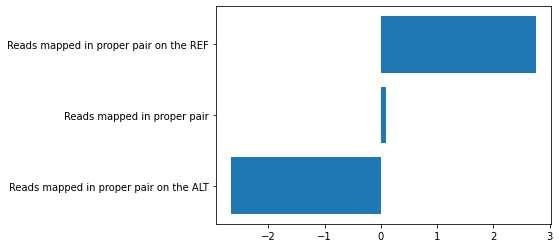

In [24]:
print(clf_logi.coef_)
feature_importances(clf_logi.coef_[0], features_names)

In [25]:
# 5-fold cross-validation
scores_logi = cross_val_score(clf_logi, X_train, y_train, cv=5)
print(scores_logi.mean())

0.8727840199750311


## Random Forest

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [27]:
clf_rf = RandomForestClassifier(n_estimators=20, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[21  0  0]
 [ 1 38  5]
 [ 1  3 43]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.93      0.86      0.89        44
           2       0.90      0.91      0.91        47

    accuracy                           0.91       112
   macro avg       0.91      0.93      0.92       112
weighted avg       0.91      0.91      0.91       112

0.9107142857142857


In [29]:
# 5-fold cross-validation
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print(scores_rf.mean())

0.8883895131086141


## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [30]:
"""pred=model.predict(x_test)
Model Evaluation
# Importing the classification report and confusion matrix

print(confusion_matrix(y_test,pred))
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
print(classification_report(y_test, pred))"""

'pred=model.predict(x_test)\nModel Evaluation\n# Importing the classification report and confusion matrix\n\nprint(confusion_matrix(y_test,pred))\n[[17  0  0]\n [ 0 16  0]\n [ 0  0 12]]\nprint(classification_report(y_test, pred))'

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"

In [32]:
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [33]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

0.9085393258426967


[[ 1.93850982 -2.33183479 -0.39332498]
 [ 1.20863431 -0.63741327  0.57122103]
 [ 2.14235476 -1.74805948  0.39429529]]


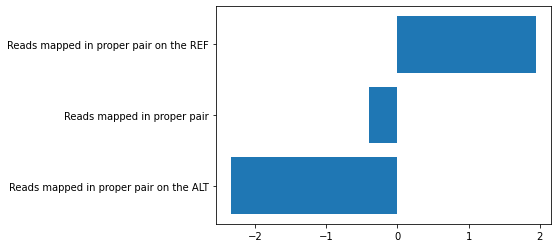

array([1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2,
       1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2,
       2, 2], dtype=int64)

In [34]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
print(svm_lin.coef_)
feature_importances(svm_lin.coef_[0], features_names)


pred_lin = clf.predict(X_test)
pred_lin

In [35]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[16  2  0]
 [ 4 39  0]
 [ 0  8 43]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.80      0.91      0.85        43
           2       1.00      0.84      0.91        51

    accuracy                           0.88       112
   macro avg       0.87      0.88      0.87       112
weighted avg       0.89      0.88      0.88       112

0.875


### Using rbf (with non-linear boundary) as kernel

In [36]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
#clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())
#print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

0.8996004993757802


## DNN - Deep Neural Network

In [37]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

,f2_count_REF,f2_count_ALT,f2_count
0,210.0,12.0,222.0
1,52.0,18.0,70.0
2,248.0,22.0,270.0
3,188.0,20.0,208.0
4,218.0,22.0,240.0
...,...,...,...
555,24.0,38.0,62.0
556,24.0,62.0,86.0
557,24.0,46.0,70.0
558,16.0,44.0,60.0


In [38]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "1/0", "1/1"])
df_GIAB_2_y

,0/0,1/0,1/1
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
555,0,0,1
556,0,0,1
557,0,0,1
558,0,0,1


In [39]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(6, input_dim=3, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])


    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

<ipython-input-39-e0a2884a41fd>:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(


In [40]:
history = estimator.fit(X_train, y_train)

Epoch 1/200
23/23 - 1s - loss: 1.0335 - accuracy: 0.4821 - 945ms/epoch - 41ms/step
Epoch 2/200
23/23 - 0s - loss: 0.7871 - accuracy: 0.5804 - 62ms/epoch - 3ms/step
Epoch 3/200
23/23 - 0s - loss: 0.5664 - accuracy: 0.7991 - 51ms/epoch - 2ms/step
Epoch 4/200
23/23 - 0s - loss: 0.4435 - accuracy: 0.8862 - 43ms/epoch - 2ms/step
Epoch 5/200
23/23 - 0s - loss: 0.3844 - accuracy: 0.8728 - 49ms/epoch - 2ms/step
Epoch 6/200
23/23 - 0s - loss: 0.3649 - accuracy: 0.8862 - 29ms/epoch - 1ms/step
Epoch 7/200
23/23 - 0s - loss: 0.3401 - accuracy: 0.8906 - 30ms/epoch - 1ms/step
Epoch 8/200
23/23 - 0s - loss: 0.3312 - accuracy: 0.8951 - 48ms/epoch - 2ms/step
Epoch 9/200
23/23 - 0s - loss: 0.3395 - accuracy: 0.8839 - 42ms/epoch - 2ms/step
Epoch 10/200
23/23 - 0s - loss: 0.3272 - accuracy: 0.8839 - 38ms/epoch - 2ms/step
Epoch 11/200
23/23 - 0s - loss: 0.3096 - accuracy: 0.8951 - 24ms/epoch - 1ms/step
Epoch 12/200
23/23 - 0s - loss: 0.3088 - accuracy: 0.8884 - 21ms/epoch - 911us/step
Epoch 13/200
23/23 - 

Epoch 101/200
23/23 - 0s - loss: 0.2395 - accuracy: 0.8951 - 27ms/epoch - 1ms/step
Epoch 102/200
23/23 - 0s - loss: 0.2604 - accuracy: 0.8906 - 23ms/epoch - 997us/step
Epoch 103/200
23/23 - 0s - loss: 0.2428 - accuracy: 0.8951 - 21ms/epoch - 911us/step
Epoch 104/200
23/23 - 0s - loss: 0.2406 - accuracy: 0.8929 - 23ms/epoch - 997us/step
Epoch 105/200
23/23 - 0s - loss: 0.2452 - accuracy: 0.8973 - 23ms/epoch - 997us/step
Epoch 106/200
23/23 - 0s - loss: 0.2554 - accuracy: 0.8996 - 20ms/epoch - 867us/step
Epoch 107/200
23/23 - 0s - loss: 0.2476 - accuracy: 0.8973 - 23ms/epoch - 997us/step
Epoch 108/200
23/23 - 0s - loss: 0.2437 - accuracy: 0.9062 - 20ms/epoch - 867us/step
Epoch 109/200
23/23 - 0s - loss: 0.2423 - accuracy: 0.8951 - 20ms/epoch - 867us/step
Epoch 110/200
23/23 - 0s - loss: 0.2449 - accuracy: 0.8951 - 26ms/epoch - 1ms/step
Epoch 111/200
23/23 - 0s - loss: 0.2513 - accuracy: 0.8951 - 22ms/epoch - 953us/step
Epoch 112/200
23/23 - 0s - loss: 0.2449 - accuracy: 0.8929 - 22ms/epo

Epoch 200/200
23/23 - 0s - loss: 0.2572 - accuracy: 0.8996 - 31ms/epoch - 1ms/step


In [41]:
history.history["accuracy"]

[0.4821428656578064,
 0.5803571343421936,
 0.7991071343421936,
 0.8861607313156128,
 0.8727678656578064,
 0.8861607313156128,
 0.890625,
 0.8950892686843872,
 0.8839285969734192,
 0.8839285969734192,
 0.8950892686843872,
 0.8883928656578064,
 0.8950892686843872,
 0.8928571343421936,
 0.8883928656578064,
 0.8928571343421936,
 0.890625,
 0.890625,
 0.8861607313156128,
 0.8928571343421936,
 0.890625,
 0.8995535969734192,
 0.8995535969734192,
 0.8928571343421936,
 0.8973214030265808,
 0.8995535969734192,
 0.890625,
 0.8928571343421936,
 0.8861607313156128,
 0.8995535969734192,
 0.8973214030265808,
 0.8883928656578064,
 0.8794642686843872,
 0.8928571343421936,
 0.8861607313156128,
 0.8995535969734192,
 0.890625,
 0.8950892686843872,
 0.8995535969734192,
 0.8995535969734192,
 0.8995535969734192,
 0.8928571343421936,
 0.8973214030265808,
 0.8950892686843872,
 0.9017857313156128,
 0.8928571343421936,
 0.9040178656578064,
 0.9017857313156128,
 0.8928571343421936,
 0.8928571343421936,
 0.890625,

In [42]:
history.history["loss"]

[1.0335133075714111,
 0.7871065735816956,
 0.5664433240890503,
 0.4434873163700104,
 0.3843502700328827,
 0.3649166524410248,
 0.34005847573280334,
 0.3311682641506195,
 0.33949655294418335,
 0.32724350690841675,
 0.3096191883087158,
 0.3087760806083679,
 0.31156349182128906,
 0.30362027883529663,
 0.2961861789226532,
 0.2911263108253479,
 0.2832249701023102,
 0.2933507561683655,
 0.2815094292163849,
 0.2777042090892792,
 0.2731958031654358,
 0.268610417842865,
 0.2613234221935272,
 0.2666868567466736,
 0.26650047302246094,
 0.2632644772529602,
 0.2741928696632385,
 0.2732789218425751,
 0.2626914381980896,
 0.2503931224346161,
 0.2612319886684418,
 0.2584235370159149,
 0.2786182463169098,
 0.2599736750125885,
 0.2524319589138031,
 0.2475934773683548,
 0.24982590973377228,
 0.2507116496562958,
 0.2529456615447998,
 0.2434157431125641,
 0.24503527581691742,
 0.24732255935668945,
 0.24452993273735046,
 0.24645307660102844,
 0.24291275441646576,
 0.2458663284778595,
 0.2420332431793213,
 0

In [43]:
estimator.predict(X_test)

array([2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0,
       2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 2])

In [44]:
y_test

,0/0,1/0,1/1
453,0,0,1
341,0,0,1
177,0,1,0
86,1,0,0
332,0,0,1
...,...,...,...
88,1,0,0
235,0,1,0
352,0,0,1
33,1,0,0


In [45]:
y_test2 = y_test.copy()
y_test2["genotype"] = 0
y_test2["genotype"] = np.where(y_test2["0/0"]==1, 0, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/0"]==1, 1, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/1"]==1, 2, y_test2["genotype"])
y_test2

,0/0,1/0,1/1,genotype
453,0,0,1,2
341,0,0,1,2
177,0,1,0,1
86,1,0,0,0
332,0,0,1,2
...,...,...,...,...
88,1,0,0,0
235,0,1,0,1
352,0,0,1,2
33,1,0,0,0


In [46]:
y_test = y_test2["genotype"].to_numpy()

In [47]:
pred_DNN = estimator.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_DNN))
print(classification_report(y_test, pred_DNN))
print(accuracy_score(y_test, pred_DNN))

[[24  2  0]
 [ 1 40  3]
 [ 0  0 42]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.95      0.91      0.93        44
           2       0.93      1.00      0.97        42

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112

0.9464285714285714


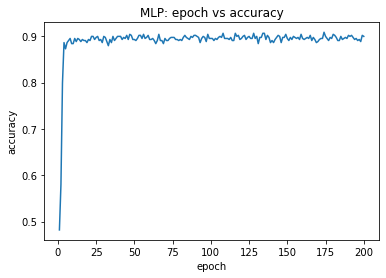

In [48]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("MLP: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 

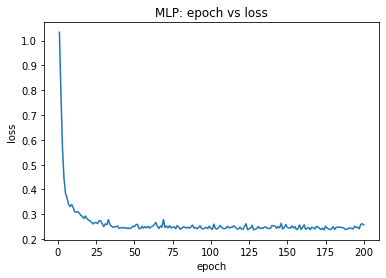

In [49]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_loss = history.history['loss']
plt.title("MLP: epoch vs loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(lst_epoch, lst_loss) 

In [50]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='relu', name='layer_1'))
model2.add(Dense(10, activation='relu', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [51]:
model().fit(X_train, y_train, epochs=200)

Epoch 1/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0862 - accuracy: 0.3214
Epoch 2/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0358 - accuracy: 0.4018
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0024 - accuracy: 0.4866
Epoch 4/200
14/14 [==============================] - 0s 1ms/step - loss: 0.9467 - accuracy: 0.7612
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8284 - accuracy: 0.7232
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.7210
Epoch 7/200
14/14 [==============================] - 0s 1ms/step - loss: 0.5362 - accuracy: 0.8281
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8705
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8705
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8795
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.8929
Epoch 84/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.9018
Epoch 85/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2377 - accuracy: 0.8996
Epoch 86/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.9018
Epoch 87/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.8996
Epoch 88/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.8996
Epoch 89/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2385 - accuracy: 0.8973
Epoch 90/200
14/14 [==============================] - 0s 1000us/step - loss: 0.2359 - accuracy: 0.9040
Epoch 91/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2375 - accuracy: 0.8951
Epoch 92/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.8862
Epoch 93/2

In [52]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 

array([[0.35060474, 0.40975004, 0.23964512],
       [0.3456419 , 0.3689345 , 0.28542358],
       [0.35308108, 0.36125678, 0.28566214],
       [0.3781391 , 0.37347448, 0.2483864 ],
       [0.35235748, 0.35069817, 0.2969444 ],
       [0.3480593 , 0.36277425, 0.28916654],
       [0.3480593 , 0.36277425, 0.28916654],
       [0.35312423, 0.37548298, 0.2713928 ],
       [0.36425248, 0.3889958 , 0.24675174],
       [0.34965363, 0.39375776, 0.25658864],
       [0.3490932 , 0.38849595, 0.26241082],
       [0.35025346, 0.37960038, 0.27014622],
       [0.35570648, 0.37367597, 0.2706175 ],
       [0.3635388 , 0.36645603, 0.27000517],
       [0.36621603, 0.36348495, 0.27029905],
       [0.35734388, 0.38681105, 0.2558451 ],
       [0.3480839 , 0.34869245, 0.30322367],
       [0.3600095 , 0.37471396, 0.26527658],
       [0.35342783, 0.3715434 , 0.27502874],
       [0.351869  , 0.37281477, 0.27531633],
       [0.34774402, 0.38759354, 0.2646624 ],
       [0.37286842, 0.3695763 , 0.25755528],
       [0.